# Code

In [2]:
%matplotlib inline
from dotenv import load_dotenv
import aisuite as ai
import time
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
load_dotenv()
client = ai.Client()

In [4]:
llms = [
    "huggingface:meta-llama/Llama-3.2-1B-Instruct",
    "huggingface:meta-llama/Llama-3.2-3B-Instruct"
]


In [5]:
def compare_llm(sys_message, inputs):
    execution_times = []
    responses = []
    
    for llm in llms:
        model_responses = []
        model_execution_times = []
        
        for question in inputs:
            start_time = time.time()
            
            messages = [{"role": "system", "content": sys_message}] + [{"role": "user", "content": question}]
            response = client.chat.completions.create(model=llm, messages=messages, max_length = 5000000)
            
            end_time = time.time()
            execution_time = end_time - start_time
            model_execution_times.append(execution_time)
            
            #breaking it into multiple lines
            formatted_response = response.choices[0].message.content.strip().split('. ')
            formatted_response = [r.strip() + '.' if not r.endswith('.') else r.strip() for r in formatted_response]
            
            model_responses.append("\n".join(formatted_response))
        
        responses.append(model_responses)
        execution_times.append(model_execution_times)
    
    return responses, execution_times

In [6]:
def generate_dataframe(llms, execution_times, responses, inputs):
    data = []
    
    for i, question in enumerate(inputs):
        for j, llm in enumerate(llms):
            response = responses[j][i]
            execution_time = execution_times[j][i]
            
            data.append({
                'Question': question,
                'Provider:Model Name': llm,
                'Execution Time (s)': execution_time,
                'Model Response': response
            })
    
    df = pd.DataFrame(data)
    df.index = df.index + 1
    return df

In [7]:
def run_scenario(sys_message, inputs):
    responses, execution_times = compare_llm(sys_message, inputs)
    df = generate_dataframe(llms, execution_times, responses, inputs)
    timestamp = time.strftime("%Y%m%d_%H%M%S")
    df.to_csv(f"llm_comparison_{timestamp}.csv", index=False)
    print(f"Data saved to 'llm_comparison_{timestamp}.csv'")
    return df


In [8]:
def time_responsiveness(scenario):

    mean_execution_time = scenario.groupby("Provider:Model Name")["Execution Time (s)"].mean()
    print(mean_execution_time)

    colors = []
    for model in mean_execution_time.index:
        if model == "huggingface:meta-llama/Llama-3.2-1B-Instruct":
            colors.append("blue")
        elif model == "huggingface:meta-llama/Llama-3.2-3B-Instruct":
            colors.append("red")
  
            
    sorted_mean_execution_time = mean_execution_time.sort_values()
    sorted_colors = [colors[mean_execution_time.index.get_loc(model)] for model in sorted_mean_execution_time.index]
    
    plt.figure(figsize=(10, 6))
    sorted_mean_execution_time.plot(
        kind='barh',
        color=sorted_colors,
        edgecolor='black'
    )
    
    plt.xlabel('Mean Execution Time (s)', fontsize=12)
    plt.ylabel('Provider / Model Name', fontsize=12)
    plt.title('Mean Execution Time by Model', fontsize=14)
    
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()



# FEWSHOT

## Scenario 1 : Factual Question Answering

### Code

In [ ]:
sys_message = """
Instruction: Generate a comprehensive risk assessment for a multinational company looking to expand its operations into a new country. The assessment should cover economic, political, legal, environmental, and cultural factors that could impact the expansion.

Examples:

Company: XYZ Inc.
Country: India
Risk Assessment:
Economic: India has a rapidly growing economy with a large consumer market, but it is also subject to volatility due to global market fluctuations, inflation rates, and the impact of currency devaluation.
Political: While India has a stable political environment, it experiences occasional regional unrest, and changes in government policies could affect business operations, particularly in the industrial sector.
Legal: The Indian legal framework can be challenging for foreign businesses due to complex regulations, labor laws, and the slow pace of legal proceedings.
Environmental: India faces serious environmental challenges such as pollution and water scarcity, which may require companies to adhere to stricter environmental regulations.
Cultural: Understanding local cultural nuances, consumer behavior, and regional preferences will be essential for establishing a successful market presence. 

Company: ABC Ltd.
Country: Brazil
Risk Assessment:
Economic: Brazil's economy is diversified, with strengths in agriculture, mining, and energy; however, inflation and exchange rate volatility are common concerns for foreign investors.
Political: Brazil's political landscape is characterized by a mix of stability and unpredictability, with corruption scandals often affecting the regulatory environment.
Legal: Brazil has strict consumer protection and labor laws, which may require foreign companies to adapt to local business practices.
Environmental: Environmental concerns such as deforestation in the Amazon region and strict environmental regulations may present challenges, particularly for industries like agriculture and manufacturing.
Cultural: Understanding Brazil's rich cultural diversity and regional differences is crucial for effective marketing and consumer engagement.

"""

# Define the test inputs
inputs = [
    {"company": "XYZ Inc.", "country": "India"},
    {"company": "ABC Ltd.", "country": "Brazil"},
    {"company": "Global Tech", "country": "Nigeria"},
    {"company": "Eurasian Enterprises", "country": "Russia"}
]


### Dataframe

In [188]:
scenario1 = run_scenario(sys_message, inputs)
scenario1

Data saved to 'llm_comparison_20241204_142115.csv'


Question  \
1      What is the chemical symbol for water?   
2      What is the chemical symbol for water?   
3                  Who painted the Mona Lisa?   
4                  Who painted the Mona Lisa?   
5  What is the smallest country in the world?   
6  What is the smallest country in the world?   
7                  Who discovered penicillin?   
8                  Who discovered penicillin?   

                            Provider:Model Name  Execution Time (s)  \
1  huggingface:meta-llama/Llama-3.2-1B-Instruct            1.098370   
2  huggingface:meta-llama/Llama-3.2-3B-Instruct            1.087601   
3  huggingface:meta-llama/Llama-3.2-1B-Instruct            1.089996   
4  huggingface:meta-llama/Llama-3.2-3B-Instruct            1.051085   
5  huggingface:meta-llama/Llama-3.2-1B-Instruct            1.013304   
6  huggingface:meta-llama/Llama-3.2-3B-Instruct            1.047273   
7  huggingface:meta-llama/Llama-3.2-1B-Instruct            0.969045   
8  huggingface:meta-llama/Llama-3.2-3B-Instruct            1.074855   

                                      Model Response  
1              The chemical symbol for water is H2O.  
2              The chemical symbol for water is H2O.  
3  The Mona Lisa was painted by the Italian artis...  
4                                 Leonardo da Vinci.  
5  Sodvol Island, Norway is approximately 0.014 k...  
6  Vatican City is the smallest country in the wo...  
7  Alexander Fleming discovered penicillin in 192...  
8                         Answer: Alexander Fleming.

### Plot

Provider:Model Name
huggingface:meta-llama/Llama-3.2-1B-Instruct    1.042679
huggingface:meta-llama/Llama-3.2-3B-Instruct    1.065204
Name: Execution Time (s), dtype: float64


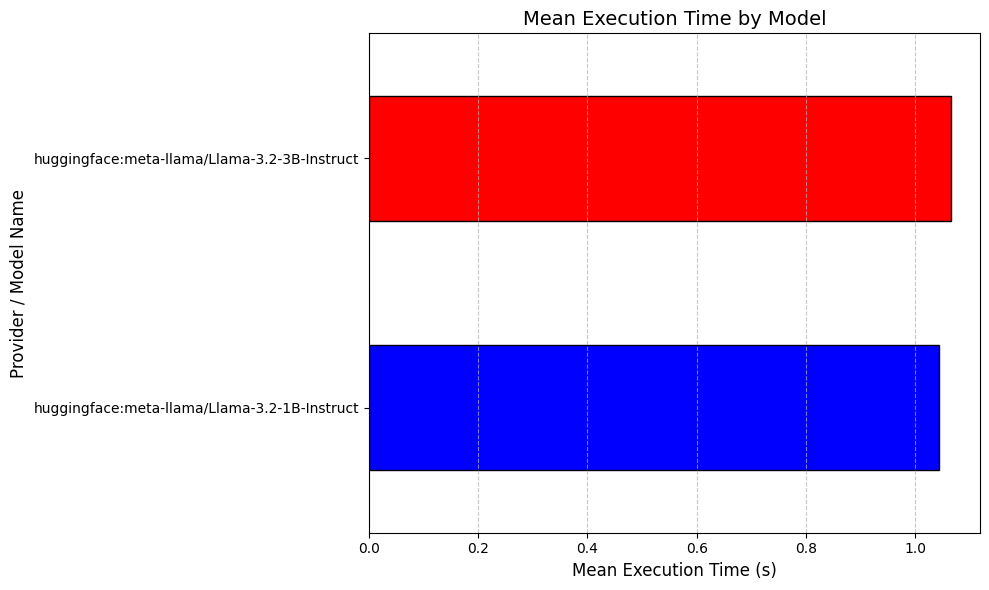

In [190]:
time_responsiveness(scenario1)


## Scenario 2 : Text Summarization

### Code

In [191]:

sys_message = """
Instruction: Summarize the following text in one sentence.

Examples:

Text: "The Eiffel Tower is a wrought-iron lattice tower in Paris, France. It was named after the engineer Gustave Eiffel, whose company designed and built the tower. It was completed in 1889 and was the tallest man-made structure at the time."
Summary: "The Eiffel Tower in Paris, completed in 1889, was designed by Gustave Eiffel and was the tallest man-made structure at the time."

Text: "The Amazon Rainforest is the largest tropical rainforest in the world, covering over 5.5 million square kilometers. It plays a key role in regulating the global climate."
Summary: "The Amazon Rainforest, covering over 5.5 million square kilometers, plays a crucial role in regulating the global climate."

"""

# Define the test inputs
inputs = [
    "The Eiffel Tower is a wrought-iron lattice tower in Paris, France. It was named after the engineer Gustave Eiffel, whose company designed and built the tower. It was completed in 1889 and was the tallest man-made structure at the time.",
    "The Amazon Rainforest is the largest tropical rainforest in the world, covering over 5.5 million square kilometers. It plays a key role in regulating the global climate.",
    "The Great Wall of China is a series of fortifications made of various materials, stretching over 13,000 miles across northern China. It was originally built to protect Chinese states from invasions and raids.",
    "The Pyramids of Giza are ancient pyramid structures located outside Cairo, Egypt. These pyramids were built as tombs for the pharaohs and their consorts during the Fourth Dynasty of the Old Kingdom of Ancient Egypt."
]


### Dataframe

In [192]:
scenario2 = run_scenario(sys_message, inputs)
scenario2

Data saved to 'llm_comparison_20241204_142909.csv'


Question  \
1  The Eiffel Tower is a wrought-iron lattice tow...   
2  The Eiffel Tower is a wrought-iron lattice tow...   
3  The Amazon Rainforest is the largest tropical ...   
4  The Amazon Rainforest is the largest tropical ...   
5  The Great Wall of China is a series of fortifi...   
6  The Great Wall of China is a series of fortifi...   
7  The Pyramids of Giza are ancient pyramid struc...   
8  The Pyramids of Giza are ancient pyramid struc...   

                            Provider:Model Name  Execution Time (s)  \
1  huggingface:meta-llama/Llama-3.2-1B-Instruct            1.063975   
2  huggingface:meta-llama/Llama-3.2-3B-Instruct            1.010267   
3  huggingface:meta-llama/Llama-3.2-1B-Instruct            0.962613   
4  huggingface:meta-llama/Llama-3.2-3B-Instruct            0.988383   
5  huggingface:meta-llama/Llama-3.2-1B-Instruct            0.980851   
6  huggingface:meta-llama/Llama-3.2-3B-Instruct            1.045971   
7  huggingface:meta-llama/Llama-3.2-1B-Instruct            0.975369   
8  huggingface:meta-llama/Llama-3.2-3B-Instruct            1.023121   

                                      Model Response  
1  The Eiffel Tower in Paris, France, was a wroug...  
2  The Eiffel Tower in Paris, completed in 1889, ...  
3  The Amazon Rainforest is the largest tropical ...  
4  The Amazon Rainforest, spanning over 5.5 milli...  
5  The Great Wall of China, stretching over 13,00...  
6  The Great Wall of China, stretching over 13,00...  
7  These are the Pyramids of Giza, a series of an...  
8  The Pyramids of Giza, built as tombs for phara...

### Plot

Provider:Model Name
huggingface:meta-llama/Llama-3.2-1B-Instruct    0.995702
huggingface:meta-llama/Llama-3.2-3B-Instruct    1.016935
Name: Execution Time (s), dtype: float64


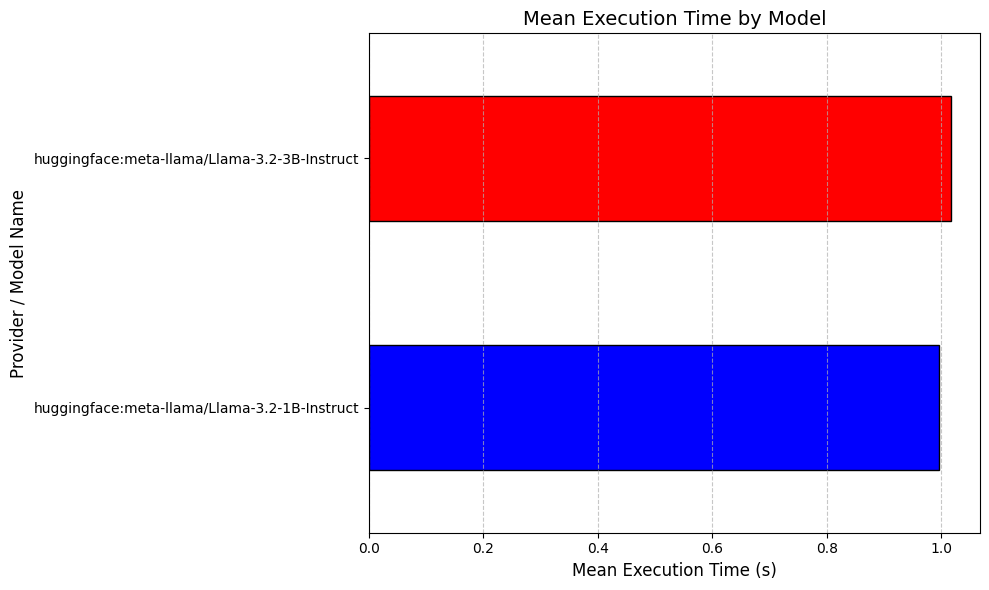

In [193]:
time_responsiveness(scenario2)


## Overall

Llama-3.2-1B-Instruct: 1.0456
Llama-3.2-3B-Instruct: 1.0576


# CoT

## Scenario 1

### Code

In [211]:
sys_prompt = """
Think step by step and provide the steps and the final result
"""

inputs = [
    "If a car travels at 60 km/h for 2 hours, how far has it traveled?",
    "A bus travels at 75 km/h for 3 hours. How far has the bus traveled?",
    "If a runner runs 12 kilometers in 1.5 hours, what is their average speed?",
    "A train travels 120 kilometers in 2 hours. What is its speed?",
    "If a cyclist rides at 15 km/h for 4 hours, how far does she ride?"
]

### DataFrame

In [212]:
scenario1 = run_scenario(sys_prompt, inputs)
scenario1

Data saved to 'llm_comparison_20241204_144950.csv'


Question  \
1   If a car travels at 60 km/h for 2 hours, how f...   
2   If a car travels at 60 km/h for 2 hours, how f...   
3   A bus travels at 75 km/h for 3 hours. How far ...   
4   A bus travels at 75 km/h for 3 hours. How far ...   
5   If a runner runs 12 kilometers in 1.5 hours, w...   
6   If a runner runs 12 kilometers in 1.5 hours, w...   
7   A train travels 120 kilometers in 2 hours. Wha...   
8   A train travels 120 kilometers in 2 hours. Wha...   
9   If a cyclist rides at 15 km/h for 4 hours, how...   
10  If a cyclist rides at 15 km/h for 4 hours, how...   

                             Provider:Model Name  Execution Time (s)  \
1   huggingface:meta-llama/Llama-3.2-1B-Instruct            1.627288   
2   huggingface:meta-llama/Llama-3.2-3B-Instruct            2.909972   
3   huggingface:meta-llama/Llama-3.2-1B-Instruct            1.838521   
4   huggingface:meta-llama/Llama-3.2-3B-Instruct            2.553303   
5   huggingface:meta-llama/Llama-3.2-1B-Instruct            1.813920   
6   huggingface:meta-llama/Llama-3.2-3B-Instruct            2.691345   
7   huggingface:meta-llama/Llama-3.2-1B-Instruct            1.800594   
8   huggingface:meta-llama/Llama-3.2-3B-Instruct            2.128508   
9   huggingface:meta-llama/Llama-3.2-1B-Instruct            1.693827   
10  huggingface:meta-llama/Llama-3.2-3B-Instruct            2.284820   

                                       Model Response  
1   To find the distance traveled, we need to mult...  
2   Let's calculate the distance traveled step by ...  
3   To find the distance traveled, we need to mult...  
4   To find the distance the bus has traveled, we ...  
5   To find the average speed of the runner, we ne...  
6   To find the runner's average speed, we need to...  
7   To find the speed of the train, we need to div...  
8   To find the speed of the train, we need to div...  
9   To find out how far the cyclist rides, we need...  
10  To find the distance rode, we can use the form...

### Plot

Provider:Model Name
huggingface:meta-llama/Llama-3.2-1B-Instruct    1.75483
huggingface:meta-llama/Llama-3.2-3B-Instruct    2.51359
Name: Execution Time (s), dtype: float64


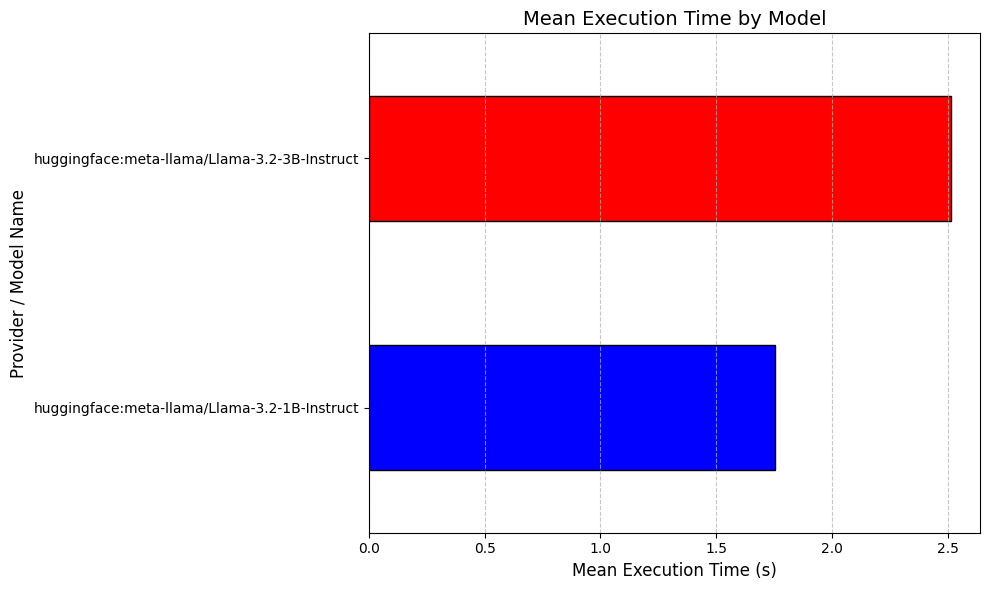

In [214]:
time_responsiveness(scenario1)

## Scenario 2

### Code

In [215]:
sys_prompt = """
Think step by step and provide the steps and the final result
"""

inputs = [
    "John has 5 apples, and he buys 3 more. How many apples does he have now?",
    "Sarah has 10 pencils, and she gives 4 to her friend. How many pencils does Sarah have now?",
    "Mike has 15 dollars. He spends 6 dollars on a book. How much money does he have left?",
    "Emma has 20 marbles. She gives 8 marbles to her friend. How many marbles does she have now?",
    "Tom had 30 candies. He ate 7 of them. How many candies are left?"
]

### DataFrame

In [216]:
scenario2 = run_scenario(sys_prompt, inputs)
scenario2

Data saved to 'llm_comparison_20241204_145606.csv'


Question  \
1   John has 5 apples, and he buys 3 more. How man...   
2   John has 5 apples, and he buys 3 more. How man...   
3   Sarah has 10 pencils, and she gives 4 to her f...   
4   Sarah has 10 pencils, and she gives 4 to her f...   
5   Mike has 15 dollars. He spends 6 dollars on a ...   
6   Mike has 15 dollars. He spends 6 dollars on a ...   
7   Emma has 20 marbles. She gives 8 marbles to he...   
8   Emma has 20 marbles. She gives 8 marbles to he...   
9   Tom had 30 candies. He ate 7 of them. How many...   
10  Tom had 30 candies. He ate 7 of them. How many...   

                             Provider:Model Name  Execution Time (s)  \
1   huggingface:meta-llama/Llama-3.2-1B-Instruct            1.997618   
2   huggingface:meta-llama/Llama-3.2-3B-Instruct            2.569286   
3   huggingface:meta-llama/Llama-3.2-1B-Instruct            1.789300   
4   huggingface:meta-llama/Llama-3.2-3B-Instruct            3.994243   
5   huggingface:meta-llama/Llama-3.2-1B-Instruct            1.468617   
6   huggingface:meta-llama/Llama-3.2-3B-Instruct            2.330560   
7   huggingface:meta-llama/Llama-3.2-1B-Instruct            1.576974   
8   huggingface:meta-llama/Llama-3.2-3B-Instruct            3.479732   
9   huggingface:meta-llama/Llama-3.2-1B-Instruct            1.678490   
10  huggingface:meta-llama/Llama-3.2-3B-Instruct            2.963893   

                                       Model Response  
1   To find out how many apples John has now, we n...  
2   Let's break it down step by step:\n\n1.\nJohn ...  
3   To determine the number of pencils Sarah has n...  
4   To find the number of pencils Sarah has now, w...  
5   To find out how much money Mike has left, we n...  
6   To find out how much money Mike has left, we n...  
7   To find out how many marbles Emma has left, we...  
8   To find out how many marbles Emma has now, we ...  
9   To find the number of candies left, we need to...  
10  To find the number of candies left, we need to...

### Plot

Provider:Model Name
huggingface:meta-llama/Llama-3.2-1B-Instruct    1.702200
huggingface:meta-llama/Llama-3.2-3B-Instruct    3.067543
Name: Execution Time (s), dtype: float64


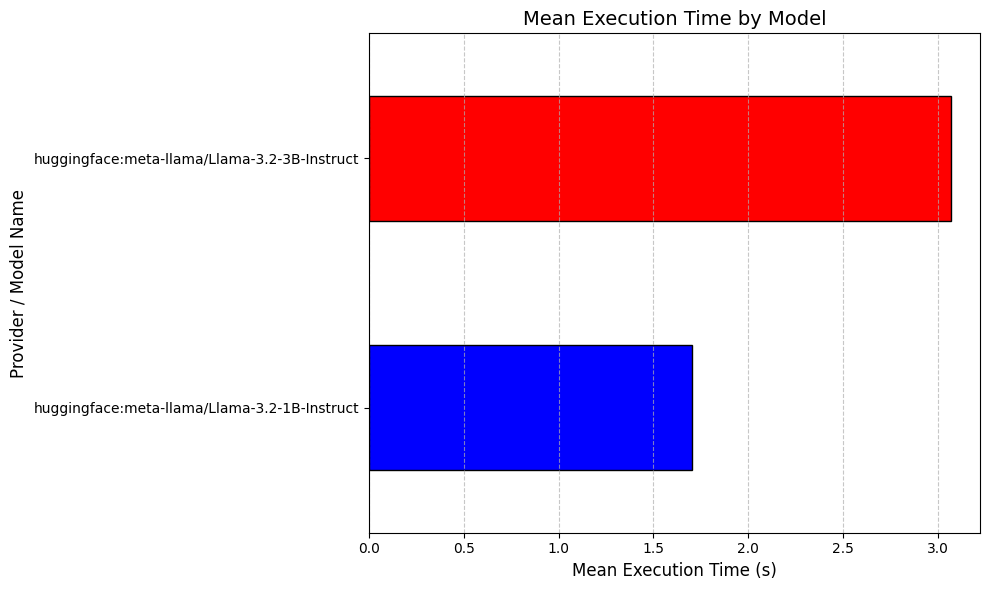

In [217]:
time_responsiveness(scenario2)

## Overall


Llama-3.2-1B-Instruct: 1.7942
Llama-3.2-3B-Instruct: 2.7967

# Few-Shot + CoT

## Scenario 1

### Code

In [224]:
sys_prompt = """
Instruction: Solve the following mathematical problems, showing detailed reasoning.

Examples:

Question: If a car travels at 60 km/h for 2 hours, how far has it traveled?
Reasoning: The distance traveled is calculated using the formula: Distance = Speed × Time.
Distance = 60 km/h × 2 hours = 120 km.
Answer: 120 km.

Question: A bus travels at 75 km/h for 3 hours. How far has the bus traveled?
Reasoning: The distance traveled is calculated using the same formula: Distance = Speed × Time.
Distance = 75 km/h × 3 hours = 225 km.
Answer: 225 km.

Question: A cyclist rides at 15 km/h for 4 hours. How far does she ride?
Reasoning: Distance = Speed × Time.
Distance = 15 km/h × 4 hours = 60 km.
Answer: 60 km.
    """

inputs = [
    "A bus travels at 75 km/h for 3 hours. How far has the bus traveled?",
    "A train travels 120 kilometers in 2 hours. What is its speed?",
    "A cyclist rides at 15 km/h for 4 hours. How far does she ride?",
    "A bus travels at 60 km/h for 5 hours. How far has it traveled?"
]

### DataFrame

In [225]:
scenario1 = run_scenario(sys_prompt, inputs)
scenario1

Data saved to 'llm_comparison_20241204_150448.csv'


Question  \
1  A bus travels at 75 km/h for 3 hours. How far ...   
2  A bus travels at 75 km/h for 3 hours. How far ...   
3  A train travels 120 kilometers in 2 hours. Wha...   
4  A train travels 120 kilometers in 2 hours. Wha...   
5  A cyclist rides at 15 km/h for 4 hours. How fa...   
6  A cyclist rides at 15 km/h for 4 hours. How fa...   
7  A bus travels at 60 km/h for 5 hours. How far ...   
8  A bus travels at 60 km/h for 5 hours. How far ...   

                            Provider:Model Name  Execution Time (s)  \
1  huggingface:meta-llama/Llama-3.2-1B-Instruct            1.980463   
2  huggingface:meta-llama/Llama-3.2-3B-Instruct            2.768214   
3  huggingface:meta-llama/Llama-3.2-1B-Instruct            1.602890   
4  huggingface:meta-llama/Llama-3.2-3B-Instruct            2.283785   
5  huggingface:meta-llama/Llama-3.2-1B-Instruct            1.682106   
6  huggingface:meta-llama/Llama-3.2-3B-Instruct            2.692504   
7  huggingface:meta-llama/Llama-3.2-1B-Instruct            1.898373   
8  huggingface:meta-llama/Llama-3.2-3B-Instruct            2.586338   

                                      Model Response  
1  To calculate the distance traveled by the bus,...  
2  To find the distance the bus has traveled, we ...  
3  To find the speed of the train, we need to div...  
4  Reasoning: The speed of the train can be calcu...  
5  To find the distance the cyclist has ridden, w...  
6  To find the distance the cyclist has ridden, w...  
7  To find the distance traveled, we need to use ...  
8  To calculate the distance traveled, we'll appl...

### Plot

Provider:Model Name
huggingface:meta-llama/Llama-3.2-1B-Instruct    1.790958
huggingface:meta-llama/Llama-3.2-3B-Instruct    2.582710
Name: Execution Time (s), dtype: float64


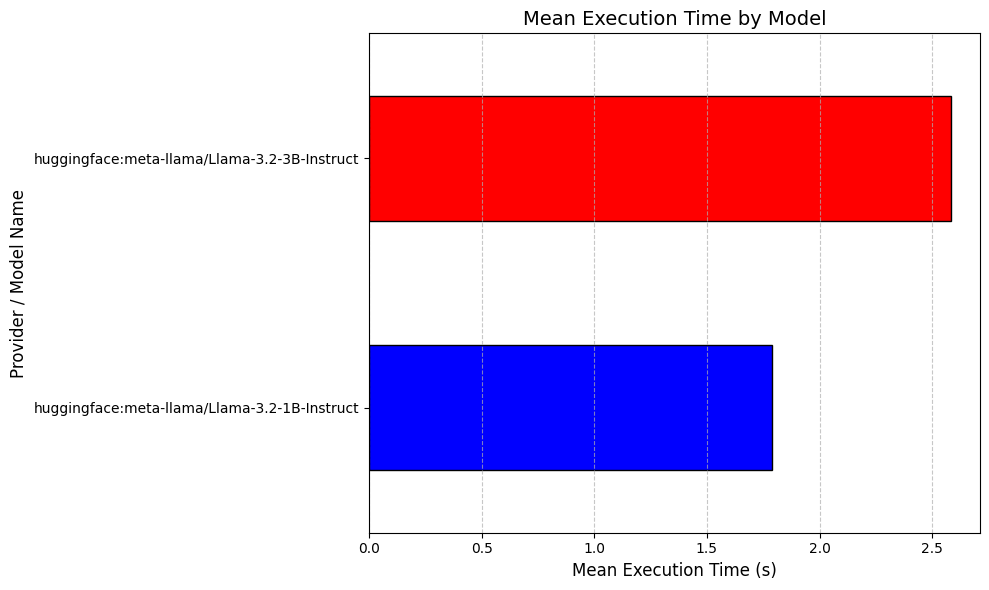

In [226]:
time_responsiveness(scenario1)

## Scenario 2

### Code

In [227]:
sys_prompt = """
Instruction: Solve the following word problems, showing detailed reasoning.

Examples:

Question: John has 5 apples, and he buys 3 more. How many apples does he have now?
Reasoning: John initially has 5 apples and buys 3 more. So, 5 + 3 = 8 apples.
Answer: 8 apples.

Question: Sarah has 10 pencils, and she gives 4 to her friend. How many pencils does Sarah have now?
Reasoning: Sarah initially has 10 pencils and gives 4 away. So, 10 - 4 = 6 pencils.
Answer: 6 pencils.

Question: Mike has 15 dollars. He spends 6 dollars on a book. How much money does he have left?
Reasoning: Mike has 15 dollars and spends 6 dollars. So, 15 - 6 = 9 dollars.
Answer: 9 dollars.
"""


inputs = [
    "Sarah has 10 pencils, and she gives 4 to her friend. How many pencils does Sarah have now?",
    "Mike has 15 dollars. He spends 6 dollars on a book. How much money does he have left?",
    "Tom had 30 candies. He ate 7 of them. How many candies are left?",
    "Lily had 40 chocolates. She ate 12 of them. How many chocolates are left?"
]

### DataFrame

In [228]:
scenario2 = run_scenario(sys_prompt, inputs)
scenario2

Data saved to 'llm_comparison_20241204_150711.csv'


Question  \
1  Sarah has 10 pencils, and she gives 4 to her f...   
2  Sarah has 10 pencils, and she gives 4 to her f...   
3  Mike has 15 dollars. He spends 6 dollars on a ...   
4  Mike has 15 dollars. He spends 6 dollars on a ...   
5  Tom had 30 candies. He ate 7 of them. How many...   
6  Tom had 30 candies. He ate 7 of them. How many...   
7  Lily had 40 chocolates. She ate 12 of them. Ho...   
8  Lily had 40 chocolates. She ate 12 of them. Ho...   

                            Provider:Model Name  Execution Time (s)  \
1  huggingface:meta-llama/Llama-3.2-1B-Instruct            1.750500   
2  huggingface:meta-llama/Llama-3.2-3B-Instruct            2.426968   
3  huggingface:meta-llama/Llama-3.2-1B-Instruct            1.772973   
4  huggingface:meta-llama/Llama-3.2-3B-Instruct            2.699959   
5  huggingface:meta-llama/Llama-3.2-1B-Instruct            1.733872   
6  huggingface:meta-llama/Llama-3.2-3B-Instruct            2.521939   
7  huggingface:meta-llama/Llama-3.2-1B-Instruct            1.793734   
8  huggingface:meta-llama/Llama-3.2-3B-Instruct            2.369818   

                                      Model Response  
1  To find out how many pencils Sarah has now, we...  
2  To find out how many pencils Sarah has now, we...  
3  To find out how much money Mike has left, we n...  
4  Let's solve the problem.\n\nMike initially has...  
5  To find out how many candies Tom has left, we ...  
6  To find out how many candies Tom has left, we ...  
7  To find the number of chocolates left, we need...  
8  Let's solve this word problem step by step.\n\...

### Plot

Provider:Model Name
huggingface:meta-llama/Llama-3.2-1B-Instruct    1.762770
huggingface:meta-llama/Llama-3.2-3B-Instruct    2.504671
Name: Execution Time (s), dtype: float64


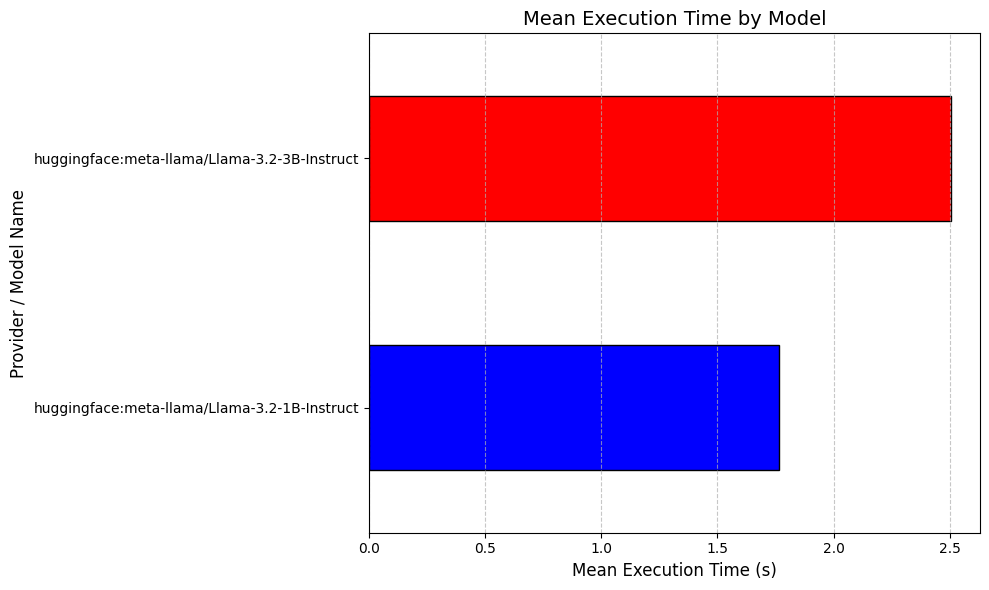

In [229]:
time_responsiveness(scenario2)

## Overall

Llama-3.2-1B-Instruct: 1.7942
Llama-3.2-3B-Instruct: 2.7967


# ReAct

## Scenario 1 : Algebraic Operations

### Code

In [12]:
sys_message = """
You are managing a global supply chain during a major crisis, such as a pandemic, that has disrupted production and transportation. Your task is to evaluate the situation step-by-step, make immediate decisions, and propose both short-term and long-term solutions for restoring the supply chain's efficiency.

Consider the following key factors:
1. Current delays and bottlenecks in production and shipping.
2. Inventory management and shortage of critical goods.
3. Impact on customer orders and relations.
4. Cost reduction and risk management strategies to adapt to ongoing disruptions.

Ensure all actions are timely and rationally justified. The focus should be on balancing immediate recovery with sustainable long-term improvements.

"""

inputs = [
"""The global pandemic has caused significant delays in the production of critical components for our supply chain. Several of our key suppliers have shut down, and transportation logistics are severely disrupted. Customers are beginning to complain about delays, and we are at risk of missing major deadlines. We need to act quickly to minimize the impact, communicate effectively with stakeholders, and prepare for ongoing disruptions.
Please provide a detailed action plan to address these challenges."""
]

### Dataframe

In [13]:
scenario1 = run_scenario(sys_message, inputs)
scenario1

Data saved to 'llm_comparison_20241206_141454.csv'


Question  \
1  The global pandemic has caused significant del...   
2  The global pandemic has caused significant del...   

                            Provider:Model Name  Execution Time (s)  \
1  huggingface:meta-llama/Llama-3.2-1B-Instruct            2.894807   
2  huggingface:meta-llama/Llama-3.2-3B-Instruct            2.703651   

                                      Model Response  
1  **Step 1: Immediate Response (Timeframe - ASAP...  
2  **Short-Term Emergency Response (0-14 days)**\...

### Plot

Provider:Model Name
huggingface:meta-llama/Llama-3.2-1B-Instruct    2.894807
huggingface:meta-llama/Llama-3.2-3B-Instruct    2.703651
Name: Execution Time (s), dtype: float64


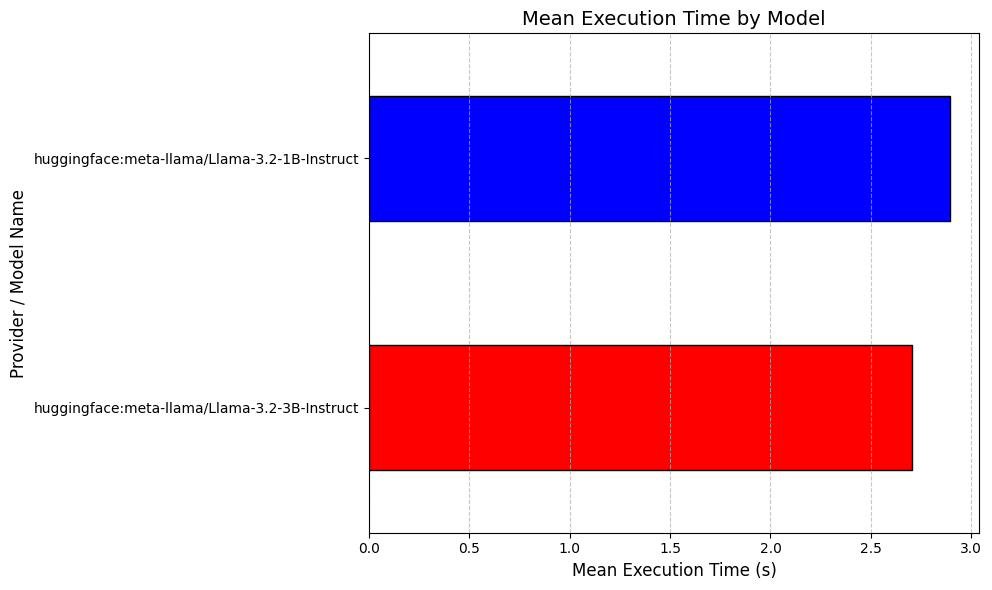

In [14]:
time_responsiveness(scenario1)


## Scenario 2: Fraction and Decimal Operations


### Code

In [252]:

sys_message = """
Solve the mathematical task or question by reasoning step-by-step. Use only the following operations:

- Add[a, b]: Add a and b.
- Subtract[a, b]: Subtract a and b.
- Multiply[a, b]: Multiply a and b.
- Divide[a, b]: Divide a and b.

Make sure to continue reasoning until all steps are completed and provide the final answer at the end. For fractions and decimals, simplify the expressions by performing the operations as needed.
"""

# Define the test inputs
inputs = [
    "Add 1/2 + 2/3",
    "Substract 1.5 - 0.75",
    "Multiply 02 * 0.3",
    "Solve for x : 2/x = 4"
]


### Dataframe

In [253]:
scenario2 = run_scenario(sys_message, inputs)
scenario2

Data saved to 'llm_comparison_20241204_162812.csv'


Question                           Provider:Model Name  \
1          Add 1/2 + 2/3  huggingface:meta-llama/Llama-3.2-1B-Instruct   
2          Add 1/2 + 2/3  huggingface:meta-llama/Llama-3.2-3B-Instruct   
3   Substract 1.5 - 0.75  huggingface:meta-llama/Llama-3.2-1B-Instruct   
4   Substract 1.5 - 0.75  huggingface:meta-llama/Llama-3.2-3B-Instruct   
5      Multiply 02 * 0.3  huggingface:meta-llama/Llama-3.2-1B-Instruct   
6      Multiply 02 * 0.3  huggingface:meta-llama/Llama-3.2-3B-Instruct   
7  Solve for x : 2/x = 4  huggingface:meta-llama/Llama-3.2-1B-Instruct   
8  Solve for x : 2/x = 4  huggingface:meta-llama/Llama-3.2-3B-Instruct   

   Execution Time (s)                                     Model Response  
1            1.824512  To add 1/2 and 2/3, we need to first find a co...  
2            2.612355  To add these fractions, we need to have the sa...  
3            1.738113  To subtract 1.5 and 0.75, we need to follow th...  
4            2.569203  To subtract 1.5 from 0.75, we'll perform the o...  
5            1.577339  To multiply 02 and 0.3, we need to follow the ...  
6            1.719863  To multiply 0.2 and 0.3, we need to follow the...  
7            1.591465  To solve for x in the equation 2/x = 4, we can...  
8            2.468184  To solve for x, we need to isolate x on one si...

### Plot

Provider:Model Name
huggingface:meta-llama/Llama-3.2-1B-Instruct    1.682857
huggingface:meta-llama/Llama-3.2-3B-Instruct    2.342401
Name: Execution Time (s), dtype: float64


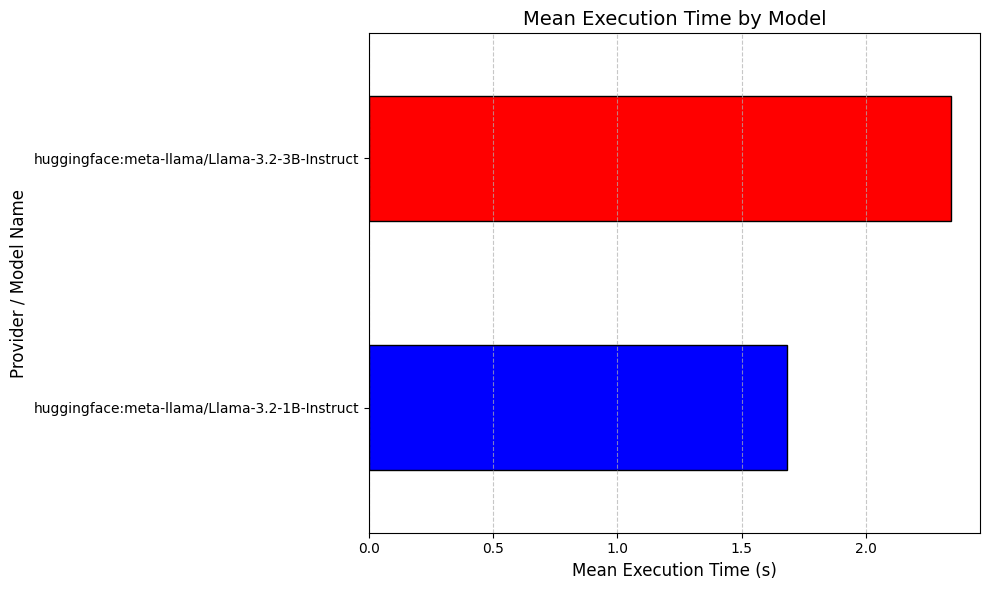

In [255]:
time_responsiveness(scenario2)


## Overall

Llama-3.2-1B-Instruct : 1.7123
Llama-3.2-3B-Instruct : 2.5060